In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
env = gym.make("Taxi-v3").env

In [3]:
print("State space: ",env.observation_space) 
print("Action space: ", env.action_space)


State space:  Discrete(500)
Action space:  Discrete(6)


In [4]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [5]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1

In [6]:
#Plotting matrix
reward_list = []
dropouts_list = []

In [7]:
episode_number = 10000
for i in range(1,episode_number): 
    state = env.reset() 
    reward_count = 0
    dropouts = 0
    while True: 
        if random.uniform(0,1) < epsilon: 
            action = env.action_space.sample() 
            action = np.argmax(q_table[state]) 

        # action process and take reward, take observations
        next_state, reward, done, _ = env.step(action)
        old_value = q_table[state,action]
        #next_value
        next_max = np.max(q_table[next_state])
        next_value = (1-alpha)*old_value + alpha*(reward + gamma*next_max) #q_table güncellemek için
        # Q table update
        q_table[state,action] = next_value 
        # Update state
        state = next_state
        # find wrong dropouts
        if reward == -10:
            dropouts +=1
        if done:
            break
        reward_count += reward
    if i%10 == 0:
        dropouts_list.append(dropouts)
        reward_list.append(reward_count)
        print("Episode: {}, reward {}, wrong dropout {}".format(i,reward_count,dropouts))


Episode: 10, reward -567, wrong dropout 16
Episode: 20, reward -826, wrong dropout 33
Episode: 30, reward -778, wrong dropout 29
Episode: 40, reward -677, wrong dropout 24
Episode: 50, reward -459, wrong dropout 12
Episode: 60, reward -348, wrong dropout 7
Episode: 70, reward -290, wrong dropout 12
Episode: 80, reward -198, wrong dropout 4
Episode: 90, reward -409, wrong dropout 9
Episode: 100, reward -279, wrong dropout 11
Episode: 110, reward -128, wrong dropout 1
Episode: 120, reward -31, wrong dropout 0
Episode: 130, reward -178, wrong dropout 4
Episode: 140, reward -148, wrong dropout 5
Episode: 150, reward -21, wrong dropout 0
Episode: 160, reward -252, wrong dropout 7
Episode: 170, reward -193, wrong dropout 3
Episode: 180, reward -212, wrong dropout 6
Episode: 190, reward -281, wrong dropout 13
Episode: 200, reward -192, wrong dropout 3
Episode: 210, reward -106, wrong dropout 2
Episode: 220, reward -146, wrong dropout 5
Episode: 230, reward -154, wrong dropout 5
Episode: 240, 

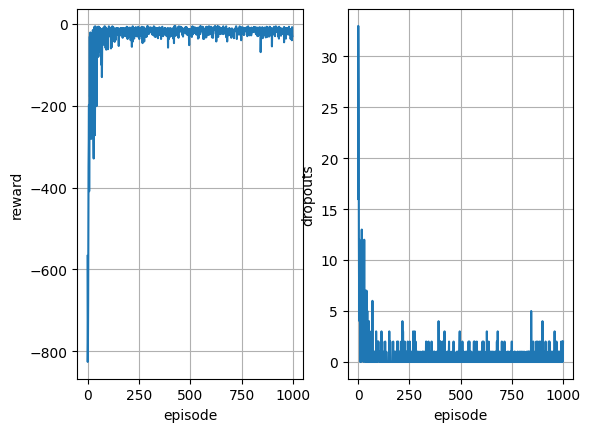

In [8]:
#visualize
fi, axs = plt.subplots(1,2)
axs[0].plot(reward_list)
axs[0].set_xlabel("episode")
axs[0].set_ylabel("reward")
#Another Plot
axs[1].plot(dropouts_list)
axs[1].set_xlabel("episode")
axs[1].set_ylabel("dropouts")

axs[0].grid(True)
axs[1].grid(True)

plt.show()

In [9]:
print(q_table)

[[ 0.          0.          0.          0.          0.          0.        ]
 [-1.08074757 -0.97269309 -1.92255134 -0.54612454  1.62261467 -8.09687538]
 [ 3.23027272  5.03513101  1.18609945  4.83037419  7.7147     -3.17256603]
 ...
 [-1.04661746  0.17820711 -1.04661746  3.48734875 -1.97370488 -2.58842625]
 [-2.67462373 -2.2735117  -2.67299285  2.36464587 -3.53845043 -2.80591207]
 [ 1.22221266 -0.199      -0.199      16.79086932 -0.41858226 -1.        ]]


In [12]:
# taxi row, taxi column, passenger index, destination
env.encode(0,0,3,4) 

16

In [13]:
env.s = env.encode(0,0,3,4)

In [15]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [10]:
print(q_table[16,:])

[14.208133   16.79526959 13.83907256 16.86566436  7.97261049 20.        ]


In [16]:
env.s = env.encode(4,4,4,3)

In [18]:
env.s

499

In [19]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B:_|
+---------+
  (Dropoff)


In [20]:
print(q_table[499,:])

[ 1.22221266 -0.199      -0.199      16.79086932 -0.41858226 -1.        ]
